# AI / ML Term-works
Implemented by Ajay Nagaraj M - 2SD19CS008

## Term-Work 1 :- Implementing A* Algorithm

In [306]:
def aStarAlgo(start_node, stop_node):
    open_set = set(start_node)
    closed_set = set()
    g = {}  # store distance from starting node
    parents = {}  # parents contains an adjacency map of all nodes

    # distance of starting node from itself is zero
    g[start_node] = 0
    # start_node is root node i.e it has no parent nodes
    # so start_node is set to its own parent node
    parents[start_node] = start_node

    while len(open_set) > 0:
        n = None

        # node with lowest f() is found
        for v in open_set:
            if n is None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v

        if n == stop_node or Graph_nodes[n] is None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
                # nodes 'm' not in first and last set are added to first
                # n is set its parent
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight


                # for each node m,compare its distance from start i.e g(m) to the
                # from start through n node
                else:
                    if g[m] > g[n] + weight:
                        # update g(m)
                        g[m] = g[n] + weight
                        # change parent of m to n
                        parents[m] = n

                        # if m in closed set,remove and add to open
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)

        if n == None:
            print('Path does not exist!')
            return None

        # if the current node is the stop_node
        # then we begin reconstructing the path from it to the start_node
        if n == stop_node:
            path = []

            while parents[n] != n:
                path.append(n)
                n = parents[n]

            path.append(start_node)

            path.reverse()

            print('Path found: {}'.format(path))
            return path

        # remove n from the open_list, and add it to closed_list
        # because all of his neighbors were inspected
        open_set.remove(n)
        closed_set.add(n)

    print('Path does not exist!')
    return None


# define function to return neighbor and its distance
# from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None


# for simplicity, we ll consider heuristic distances given
# and this function returns heuristic distance for all nodes
def heuristic(n):
    H_dist = {
        'A': 11,
        'B': 6,
        'C': 99,
        'D': 1,
        'E': 7,
        'G': 0,
    }

    return H_dist[n]


# Describe your graph here
Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1), ('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],
}

aStarAlgo('A', 'G')

Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

## Term-Work 2 :- Implementing BFS & DFS

### DFS

In [307]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['I'],
    'F': ['J'],
    'G': ['K'],
    'H': ['L'],
    'I': ['M'],
    'J': ['N'],
    'K': ['O'],
    'L': [],
    'M': [],
    'N': [],
    'O':[]
}
# set to keep track of visited nodes
visited = set()

print("DFS : ")
def dfs(visited, graph, node):
    if node not in visited:
        print(node, end=" ")
        visited.add(node)
        for neighbor in graph[node]:
            dfs(visited, graph, neighbor)


# Driver code
dfs(visited, graph, 'A')

DFS : 
A B D H L E I M C F J N G K O 

### BFS

In [308]:
visited = []
# initialize a queue
queue = []
level = { }


# function to implement BFS
def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)
    level[node] = 0
    # Loop to visit each node
    while queue:
        m = queue.pop(0)
        if level[m] == 0 or level[m]%2 == 0:
            print(m, end=" ")

        for neighbor in graph[m]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
                level[neighbor] = level[m]+1


# Driver code
print("BFS : ")
bfs(visited, graph, 'A')
print()
print(level)

BFS : 
A D E F G L M N O 
{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2, 'G': 2, 'H': 3, 'I': 3, 'J': 3, 'K': 3, 'L': 4, 'M': 4, 'N': 4, 'O': 4}


## Term-Work 3 :- Implementing Naive Bayes Algorithm

### 1) English Text with positive and negative statements


In [1]:
"""
Importing Libraries
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

import numpy as np

In [310]:
pd.set_option('display.max_columns',None)
data = pd.read_csv('Datasets/Positive&Negative.csv')
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [311]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop('package_name', axis=1)

    # Convert text to lowercase
    data['review'] = data['review'].str.strip().str.lower()
    return data

In [312]:
data = preprocess_data(data)
# Split into training and testing data
x = data['review']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [313]:
print(x)

597    fantastic and helpful i find this app so helpf...
60     awsome great  type of social media nothing wro...
660    cannot use properly ŕ¤žŕ¤˛ŕ¤žŕ¤ ŕ¤ŕ¤žŕ¤šŕ¤żŕ...
876    2many adds. great game ruined by too many adds...
504               now perfect, with animated gif support
                             ...                        
76     i hated it i am able to log in successfully bu...
870    kinda like a 2d kingdom havoc fun!  if kingdom...
80     bugs with contact syncing very frustrated. aft...
414    we have wifi with full internet connection. an...
785    keeps crashing i really do love the browser ov...
Name: review, Length: 668, dtype: object


In [314]:
print(y)

597    1
60     0
660    0
876    0
504    1
      ..
76     0
870    1
80     0
414    0
785    0
Name: polarity, Length: 668, dtype: int64


In [315]:
print(x_test)

375    ui & customization dark theme and color option...
355    app stops mid call having an issue with viber ...
252    bookmarks the option to open a bookmark in a n...
350    viber s.a.r.l. this app helps me to stay in co...
641    some time creating problm network problm it se...
                             ...                        
103    doesn't work challenge page fails to load. it'...
107    the worst!! this newer version/update might lo...
857    how to upgrade angry birds angry birds is real...
100    down to 1 star after backward redesign this ap...
174    the new theme is not compatible with my device...
Name: review, Length: 223, dtype: object


In [316]:
print(y_test)

375    0
355    0
252    0
350    1
641    0
      ..
103    0
107    0
857    1
100    0
174    0
Name: polarity, Length: 223, dtype: int64


In [317]:
# Vectorize text reviews to numbers

vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [318]:
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [319]:
model.score(x_test, y_test)

0.8565022421524664

### Testing On Sample Data

In [320]:
val = model.predict(vec.transform(['Very good app simply awesome']))
if val == 1:
    print("Positive Statement")
else:
    print("Negative Statement")

Positive Statement


In [321]:
val = model.predict(vec.transform(['Very bad performance']))
if val == 1:
    print("Positive Statement")
else:
    print("Negative Statement")

Negative Statement


### ConfusionMatrix

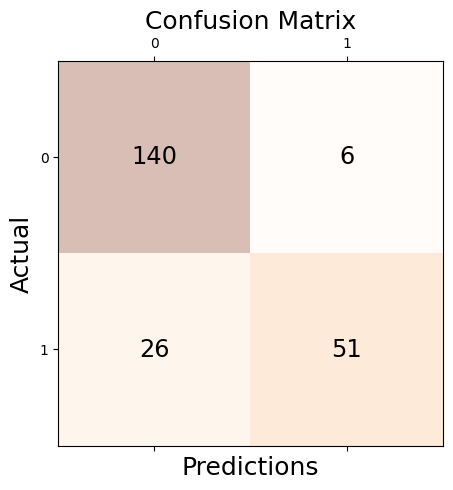

In [322]:
y_pred = model.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Precision score
Precision Score = TP / (FP + TP)

In [323]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.895


### Recall Score
Recall Score = TP / (FN + TP)

In [324]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.662


### Accuracy Score
Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

In [325]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.857


## 2) E-mail to bifurcate SPAM and NON SPAM messages

In [326]:
"""
import os

Preparing the CSV file (Dataset) using the mails in the .txt format

mail_content = []
mail_type = []

path = "Mail/"
Type = os.listdir(path)

for mailClass in Type:
    if mailClass == "ham":
        mails = os.listdir(path+mailClass)
        for mail in mails:
            fp = open(path+mailClass+"/"+mail, 'r', newline='', encoding="cp437", errors='ignore')
            content = fp.read()
            mail_content.append(content)
            mail_type.append(1)
    else:
        mails = os.listdir(path+mailClass)
        for mail in mails:
            fp = open(path+mailClass+"/"+mail, 'r', newline='', encoding="cp437", errors='ignore')
            content = fp.read()
            mail_content.append(content)
            mail_type.append(0)


mail_content_df = pd.DataFrame(mail_content, columns=['Content'])
mail_type_df = pd.DataFrame(mail_type, columns=['Type'])

mail_classification_df = pd.concat( [mail_content_df, mail_type_df], axis=1 )
"""

'\nimport os\n\nPreparing the CSV file (Dataset) using the mails in the .txt format\n\nmail_content = []\nmail_type = []\n\npath = "Mail/"\nType = os.listdir(path)\n\nfor mailClass in Type:\n    if mailClass == "ham":\n        mails = os.listdir(path+mailClass)\n        for mail in mails:\n            fp = open(path+mailClass+"/"+mail, \'r\', newline=\'\', encoding="cp437", errors=\'ignore\')\n            content = fp.read()\n            mail_content.append(content)\n            mail_type.append(1)\n    else:\n        mails = os.listdir(path+mailClass)\n        for mail in mails:\n            fp = open(path+mailClass+"/"+mail, \'r\', newline=\'\', encoding="cp437", errors=\'ignore\')\n            content = fp.read()\n            mail_content.append(content)\n            mail_type.append(0)\n\n\nmail_content_df = pd.DataFrame(mail_content, columns=[\'Content\'])\nmail_type_df = pd.DataFrame(mail_type, columns=[\'Type\'])\n\nmail_classification_df = pd.concat( [mail_content_df, mail_type

In [327]:
# mail_classification_df.head()

In [328]:
# mail_classification_df.to_excel("MailDataset.xlsx",  engine='xlsxwriter')

In [329]:
data = pd.read_csv('Datasets/MailDatasetNaiveBayes.csv', encoding="cp437")
data.head()

,Unnamed: 0,Content,Type
0,0,Subject: key hr issues going forward\r\na ) ye...,1
1,1,Subject: congrats !\r\ncontratulations on the ...,1
2,2,Subject: re : key hr issues going forward\r\na...,1
3,3,Subject: epmi files protest of entergy transco...,1
4,4,Subject: california power 2 / 8\r\nplease cont...,1


In [330]:
def preprocess_data(data):
    # Convert text to lowercase
    data['Content'] = data['Content'].str.strip().str.lower()
    return data

In [331]:
data = preprocess_data(data)
# Split into training and testing data
x = data['Content']
y = data['Type']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [332]:
print(x)

112     subject: restraining order\r\nso has the restr...
2997    subject: enron mentions - 11 / 17 / 01 - 11 / ...
5223    subject: savvy investors small - cap report\r\...
1353    subject: p & l explanation for 7 / 31\r\ntotal...
4981    subject: new product ! cialis soft tabs .\r\nh...
                              ...                        
5271    subject: account billing statement selma\r\nwh...
2450    subject: turbine disposition exposure - - mhi ...
1211    subject: re : rahil\r\nlouise ,\r\nthanks for ...
3433    subject: re : integration meeting\r\nyou want ...
1071    subject: re : mexico\r\ni have been attempting...
Name: Content, Length: 4134, dtype: object


In [333]:
print(y)

112     1
2997    1
5223    0
1353    1
4981    0
       ..
5271    0
2450    1
1211    1
3433    1
1071    1
Name: Type, Length: 4134, dtype: int64


In [334]:
print(x_test)

2913    subject: trade counts : 8 am\r\nhi louise ,\r\...
795     subject: california update p . 2 ; 5 / 29 / 01...
2190    subject: fw : what is our\r\ntotal gross margi...
1628    subject: gtv - 2 status files\r\nattached are ...
5068    subject: the extender - real product , real re...
                              ...                        
3097    subject: i ' ll work up the eol 2002 budget fi...
3864    subject: couple of things\r\nis it okay if i g...
4574    subject: entra em www . heartandsoul . pt e ga...
2433    subject: focus group survey results\r\nto : ma...
1193    subject: fw : excel spreadsheet\r\nhere is a s...
Name: Content, Length: 1378, dtype: object


In [335]:
print(y_test)

2913    1
795     1
2190    1
1628    1
5068    0
       ..
3097    1
3864    1
4574    0
2433    1
1193    1
Name: Type, Length: 1378, dtype: int64


In [336]:
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [337]:
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [338]:
model.score(x_test, y_test)

0.9891146589259797

### Testing On Sample Data

In [339]:
str = """Subject: congrats !
contratulations on the execution of the central maine sos deal ! this is another great example of what we can do when everyone comes together to get something done . this transaction brings both strategic value to the business , nice positions for the book and quite a nice chunk of change as well !
great job guys !
( hey dana , are you paying for the celebration dinner ? ! )"""

str1 = """Subject: cia ; lis - o : rder meds from home now
hi again ,
we now have over 93 meds available online now !
we are having specials on xanax , vlagra , soma , amblen and vallum
free clalls with every order
more lnfo here
"""

val = model.predict(vec.transform([str]))
if val == 1:
    print("Not Spam")
else:
    print("Spam")

Not Spam


In [340]:
str = """Subject: take the reins
become
your employer .
substantial profit processing money judgments .
from anywhere .
control when you want to work .
a substantial number of our members earn 5 , 000 us to 12 , 000 us per mo .
outstanding customer support and assistance .
here for more
info
while the couple were apparently examining the strange device , rob
started to his feet and walked toward them
the crowd fell back at his approach , but the man and the girl were so
interested that they did not notice himhe was still several paces away when
the girl put out her finger and touched the indicator on the dial
discontinue orange stad , and then mail stop 1 . 200 b , followed by a rub
a
to rob ' s horror and consternation the big turk began to rise slowly into
the air , while a howl of fear burst from the crowdbut the boy made a mighty
spring and caught the turk by his foot , clinging to it with desperate
tenacity , while they both mounted steadily upward until they were far above
the city of the desert
the big turk screamed pitifully at first , and then actually fainted away
from frightrob was much frightened , on his part , for he knew if his hands
slipped from their hold he would fall to his death"""


val = model.predict(vec.transform([str]))
if val == 1:
    print("Not Spam")
else:
    print("Spam")

Spam


### ConfusionMatrix

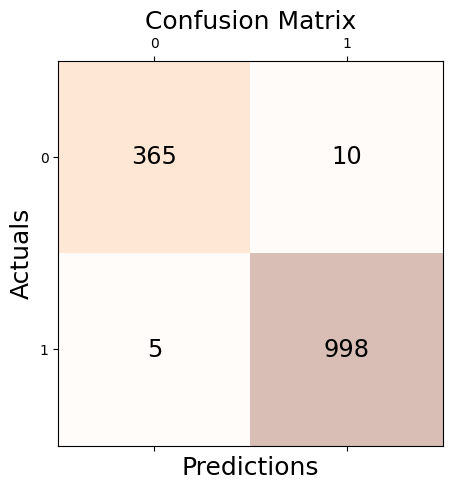

In [341]:
y_pred = model.predict(x_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Precision score
Precision Score = TP / (FP + TP)

In [342]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.990


### Recall Score
Recall Score = TP / (FN + TP)

In [343]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.995


### Accuracy Score
Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

In [344]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.989


### 3) Balance Data set to classify left, right and balance


In [345]:
df = pd.read_csv('Datasets/balance-scale.csv')
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [346]:
df['Class'] = LabelEncoder().fit_transform(df['Class'].tolist())
df

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5
...,...,...,...,...,...
620,1,5,5,5,1
621,1,5,5,5,2
622,1,5,5,5,3
623,1,5,5,5,4


In [347]:
y = df['Class']
x = df.iloc[0:,1:5]

In [348]:
x = np.array(x)
print(x)

[[1 1 1 1]
 [1 1 1 2]
 [1 1 1 3]
 ...
 [5 5 5 3]
 [5 5 5 4]
 [5 5 5 5]]


In [349]:
print(y)

0      0
1      2
2      2
3      2
4      2
      ..
620    1
621    1
622    1
623    1
624    0
Name: Class, Length: 625, dtype: int64


In [350]:
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.10, random_state=42)

In [351]:
print(x_test)
x_test.shape

[[2 5 2 4]
 [5 3 3 4]
 [1 5 4 3]
 [5 5 2 1]
 [1 3 2 4]
 [5 5 1 1]
 [5 2 2 4]
 [2 4 2 3]
 [1 3 4 2]
 [3 5 1 2]
 [1 3 5 2]
 [5 4 5 3]
 [5 1 4 1]
 [5 2 3 1]
 [3 1 3 2]
 [2 4 4 1]
 [3 5 3 5]
 [5 4 2 5]
 [4 5 3 3]
 [3 2 2 4]
 [2 5 1 5]
 [3 1 5 2]
 [4 5 2 5]
 [3 1 2 3]
 [1 3 1 1]
 [5 2 4 5]
 [1 1 3 4]
 [2 3 4 2]
 [2 3 3 5]
 [5 1 3 2]
 [1 2 3 5]
 [2 5 2 3]
 [5 5 5 3]
 [2 2 3 4]
 [5 2 2 5]
 [2 1 4 4]
 [5 5 1 5]
 [1 2 4 3]
 [2 2 4 1]
 [2 4 3 4]
 [4 2 5 2]
 [3 3 2 3]
 [1 4 4 1]
 [4 5 3 2]
 [2 5 5 2]
 [5 1 1 2]
 [2 4 4 3]
 [3 4 4 5]
 [5 2 2 2]
 [2 1 2 4]
 [4 2 4 5]
 [1 1 5 1]
 [1 2 1 4]
 [5 1 2 2]
 [3 1 2 4]
 [3 4 1 5]
 [4 4 1 5]
 [5 1 5 3]
 [2 4 2 5]
 [3 1 1 4]
 [5 4 4 3]
 [2 4 1 2]
 [5 2 1 5]]


(63, 4)

In [352]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(x, y)

ComplementNB()

In [353]:
model.score(x_test, y_test)

0.9047619047619048

### Testing On Sample Data

In [354]:
sample = [[1, 6, 1, 5]]
val = model.predict(sample)

if val == [1]:
    print("Left")
elif val == [2]:
    print("Right")
else:
    print("Balance")

Left


In [355]:
sample = [[1, 4, 1, 5]]
val = model.predict(sample)

if val == [1]:
    print("Left")
elif val == [2]:
    print("Right")
else:
    print("Balance")

Right


# Term-Work 4
###  Logistic Regression For Salary Prediction

In [356]:
"""
Importing Libraries
"""

import pandas as pd
import numpy as np

In [357]:
data = pd.read_csv('Datasets/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [358]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [359]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [360]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [361]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [362]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [363]:
model.score(x_test,y_test)

0.988169515729126

In [364]:
exp = 6
print("Salary For", end=" ")
print(exp, end=" ")
print("years of Experience Will Be : ", end="")
print(model.predict([[exp]])[0])

Salary For 6 years of Experience Will Be : 82655.54991100331


In [365]:
from sklearn.linear_model import LogisticRegression

In [366]:
model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(x,y)

In [367]:
exp = 5
print("Salary For", end=" ")
print(exp, end=" ")
print("years of Experience Will Be : ", end="")
print(model.predict([[exp]])[0])

Salary For 5 years of Experience Will Be : 66029.0


## Term-Work 5
### SVM classifier for a sample training data set

Brest Cancer Dataset

In [2]:
data = pd.read_csv('Datasets/Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
x = data.iloc[:,:-1].values
print(x)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 8.581e+02 8.455e-02]
 [2.060e+01 2.933e+01 1.401e+02 1.265e+03 1.178e-01]
 [7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02]]


In [4]:
y = data.iloc[:,-1].values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [5]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [6]:
print(x_test)

[[1.808e+01 2.184e+01 1.174e+02 1.024e+03 7.371e-02]
 [1.575e+01 1.922e+01 1.071e+02 7.586e+02 1.243e-01]
 [1.005e+01 1.753e+01 6.441e+01 3.108e+02 1.007e-01]
 [1.317e+01 1.866e+01 8.598e+01 5.346e+02 1.158e-01]
 [1.088e+01 1.562e+01 7.041e+01 3.589e+02 1.007e-01]
 [1.665e+01 2.138e+01 1.100e+02 9.046e+02 1.121e-01]
 [1.305e+01 1.384e+01 8.271e+01 5.306e+02 8.352e-02]
 [1.016e+01 1.959e+01 6.473e+01 3.117e+02 1.003e-01]
 [1.206e+01 1.274e+01 7.684e+01 4.486e+02 9.311e-02]
 [1.340e+01 1.695e+01 8.548e+01 5.524e+02 7.937e-02]
 [1.275e+01 1.670e+01 8.251e+01 4.938e+02 1.125e-01]
 [2.110e+01 2.052e+01 1.381e+02 1.384e+03 9.684e-02]
 [1.147e+01 1.603e+01 7.302e+01 4.027e+02 9.076e-02]
 [1.343e+01 1.963e+01 8.584e+01 5.654e+02 9.048e-02]
 [1.959e+01 1.815e+01 1.307e+02 1.214e+03 1.120e-01]
 [1.460e+01 2.329e+01 9.397e+01 6.647e+02 8.682e-02]
 [1.793e+01 2.448e+01 1.152e+02 9.989e+02 8.855e-02]
 [2.309e+01 1.983e+01 1.521e+02 1.682e+03 9.342e-02]
 [1.170e+01 1.911e+01 7.433e+01 4.187e+02 8.81

In [7]:
print(y_test)

[0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 0]


In [8]:
model = SVC()
model.fit(x, y)

SVC()

In [9]:
model.score(x_test, y_test)

0.8859649122807017

### Testing on sample data

In [10]:
val = [17.99, 10.38, 122.80, 1001.0, 0.11840]
res = model.predict([val])

if res == [0]:
    print("Dont Have Cancer")
else:
    print("Do Have Cancer ")

Dont Have Cancer


In [11]:
val = [13.54, 14.36, 87.46, 566.3, 0.09779]

res = model.predict([val])

if res == [0]:
    print("Dont Have Cancer")
else:
    print("Do Have Cancer ")

Do Have Cancer 


## Term-Work 6
### Implementing k-Nearest Neighbour algorithm

In [34]:
data = pd.read_csv('Datasets/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
data['Species'] = LabelEncoder().fit_transform(data['Species'].tolist())
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [36]:
x = data.iloc[:,1:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [38]:
x, x_test, y, y_test = train_test_split(x, y, test_size= 0.25, random_state=49)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x, y)

KNeighborsClassifier()

In [40]:
classifier.score(x_test, y_test)

0.9473684210526315

### Testing on sample data

In [45]:
data = [6.3,3.3,6.0,2.5]
res = classifier.predict([data])
if res == [0]:
    print("Iris-setosa")
elif res == [1]:
    print("Iris-versicolor")
else:
    print("Iris-virginica")


Iris-virginica


In [46]:
data = [7.0,3.2,4.7,1.4]
res = classifier.predict([data])
if res == [0]:
    print("Iris-setosa")
elif res == [1]:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-versicolor


In [47]:
data = [5.8,4.0,1.2,0.2]
res = classifier.predict([data])
if res == [0]:
    print("Iris-setosa")
elif res == [1]:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-setosa
